In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

class Node():
    def __init__(self, feature_name=None, threshold_val=None, left_child=None, right_child=None, info_gain=None, value=None):
        self.feature_name=feature_name
        self.threshold_val=threshold_val
        self.left_child=left_child
        self.right_child=right_child
        self.info_gain=info_gain
        self.value=value
        

1. Implementing Decision Tree

In [2]:
class DecisionTree():
    def __init__(self, min_splits=2, tree_depth=18446744073709551614):
        self.root = None
        self.min_splits = min_splits
        self.tree_depth = tree_depth
        
    
    def creating_dtree(self, dataset, current_depth=0):
        
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        no_samples, no_features = np.shape(X)
        
        if no_samples>=self.min_splits and current_depth<=self.tree_depth:
            dict_split_best = self.best_split(dataset, no_samples, no_features)
            if dict_split_best["info_gain"]>0:
                subtree_left = self.creating_dtree(dict_split_best["dataset_left"], current_depth+1)
                subtree_right = self.creating_dtree(dict_split_best["dataset_right"], current_depth+1)
                return Node(dict_split_best["index"], dict_split_best["threshold"], 
                            subtree_left, subtree_right, dict_split_best["info_gain"])
        
        leaf_value = self.calculate_decision_leaf_value(Y)
        return Node(value=leaf_value)
    def best_split(self, dataset, no_samples, no_features):
        
        best_split_dict = {}
        max_info_gain = -float("inf")

        for index in range(no_features):
            feature_values = dataset[:, index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left = np.array([row for row in dataset if row[index]<=threshold])
                dataset_right = np.array([row for row in dataset if row[index]>threshold])
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain>max_info_gain:
                        best_split_dict["index"] = index
                        best_split_dict["threshold"] = threshold
                        best_split_dict["dataset_left"] = dataset_left
                        best_split_dict["dataset_right"] = dataset_right
                        best_split_dict["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split_dict
    
    
    def information_gain(self, parent, l_child, r_child):
        
        wt_l = len(l_child) / len(parent)
        wt_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (wt_l*self.entropy(l_child) + wt_r*self.entropy(r_child))
        return gain
    
    def entropy(self, lst):
        
        class_labels = np.unique(lst)
        entropy = 0
        for cls in class_labels:
            p_cls = len(lst[lst == cls]) / len(lst)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
        
    def calculate_decision_leaf_value(self, dt):
        
        
        dt = list(dt)
        return max(dt, key=dt.count)
    
    def print_tree(self, tree=None, indent=" "):
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_name), "<=", tree.threshold_val, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left_child, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right_child, indent + indent)
    
    def fit(self, X, Y):
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.creating_dtree(dataset)
    
    def predict(self, X):
        
        predicted_vals = [self.make_prediction(x, self.root) for x in X]
        return predicted_vals
    
    def make_prediction(self, x, tree):
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_name]
        if feature_val<=tree.threshold_val:
            return self.make_prediction(x, tree.left_child)
        else:
            return self.make_prediction(x, tree.right_child)

2. Implementing Decision Tree on Iris dataset

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
 

df["type"] = iris.target




In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=41)

In [5]:
model = DecisionTree(min_splits=3, tree_depth=5)
model.fit(X_train, Y_train)

preds = model.predict(X_test)
print(preds)

[1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0]


In [6]:
model.print_tree()

X_2 <= 1.9 ? 0.9480782435939055
 left:0.0
 right:X_3 <= 1.7 ? 0.8137993698321951
  left:X_2 <= 5.0 ? 0.35335933502142136
    left:1.0
    right:2.0
  right:2.0


3. Implementing Decision Tree classifier in Sklearn

In [7]:
skl_model= DecisionTreeClassifier (criterion='entropy')
dtr= skl_model.fit(X_train, Y_train)
s_preds=dtr.predict(X_test)
s_preds

array([1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0])

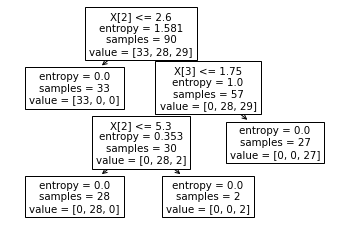

In [8]:
pic = tree.plot_tree(dtr)

In [9]:
from sklearn.metrics import accuracy_score
print('test set accuracy is for implemented tree:',accuracy_score(Y_test, preds))
print('test set accuracy is for implemented tree:',accuracy_score(Y_test, s_preds))

test set accuracy is for implemented tree: 0.9333333333333333
test set accuracy is for implemented tree: 0.9333333333333333


The threshold values computed for the implemented tree and the Sci-kit learn classifier generated tree are almost same and the depth of tree generated is seeming to be same for iris dataset, but the end classification of target is seeming to be identical except for datatype. The accuracy score is also identical.